# FEATURE SELECTION FOR FACIAL BASED ANXIETY DETECTION FROM FACIAL VIDEO
This is a final project for my Machine Learning Class, the dataset are a procured dataset from UBFC-Phys Multimodal Anxiety facial video dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [2]:
rand_num = 182
c_val = 3


df = pd.read_csv('data.csv')
label = ['MnRed','MnGreen','MnBlue', 'MnYawChg' , 'MnRollChg' , 'MnPitchChg', 'StdYawChg', 'StdRollChg', 'StdPitchChg', 'HR' , 'HRV', 'BlinkRt', 'MnHeadMv', 'StdHeadMvX', 'StdHeadMvY', 'StdHeadMv']

In [3]:
df

,Red_Mean,Green_Mean,Blue_Mean,Yaw_Change(Mean),Roll_Change(Mean),Pitch_Change(Mean),Yaw_Change(Std),Roll_Change(Std),Pitch_Change(Std),Heart_Rate,Heart_Rate_Variability,Blinking_Rate(per Min),Head_Move(Mean),Head_Move_X(Std),Head_Move_Y(Std),Head_Move(Std),Stress
0,137.981264,106.791231,79.278968,0.093762,0.075767,0.123297,0.088491,0.074178,0.119489,79.698969,85.530746,20,0.482984,0.471594,0.447666,0.447666,0
1,137.630142,106.088194,79.298300,0.100526,0.073948,0.127590,0.100238,0.074662,0.119952,79.879561,57.489146,16,0.550185,0.564949,0.480031,0.480031,0
2,138.228161,106.588485,79.663460,0.112180,0.078488,0.157454,0.124258,0.072165,0.155613,76.669091,107.559611,18,0.520554,0.551588,0.484559,0.484559,0
3,137.328074,106.202715,79.056029,0.106573,0.080763,0.135978,0.107536,0.088279,0.133814,80.436069,59.081872,8,0.436333,0.441348,0.440412,0.440412,0
4,136.981710,105.795100,78.743287,0.095510,0.068047,0.120506,0.091990,0.066605,0.114864,78.379182,80.490243,22,0.416077,0.434286,0.422133,0.422133,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,173.504727,135.994098,120.323086,0.681246,0.429745,1.009903,1.441010,1.132517,1.689375,87.123967,166.616746,48,1.670466,1.666145,1.519173,1.519173,1
672,155.197099,120.844326,105.111716,0.196583,0.157063,0.155955,0.222946,0.172617,0.161263,79.669636,173.207107,136,0.880201,0.599870,1.306814,1.306814,1
673,173.084121,134.551207,118.180344,0.576597,0.405072,0.707279,1.123952,0.936701,2.037010,83.465060,144.406539,38,2.593663,3.917427,2.550566,2.550566,1
674,167.061001,129.870624,113.230445,1.230054,0.503657,1.064122,2.104937,0.835076,1.707639,82.682353,168.957628,16,2.042088,1.886284,2.339511,2.339511,1


In [4]:
X = df.drop("Stress", axis = 1)
y = df["Stress"]

### FEATURE SELECTION
Feature selection is utilized since there are a lot of fetures that are present. ANOVA F-test will be the method of feature selection since all acquired have numerical input, while we are going to predict as numerical output '1' for anxiety and '0' for non-anxiety.

Feature MnRed: 1.064726
Feature MnGreen: 2.432877
Feature MnBlue: 0.001646
Feature MnYawChg: 49.440361
Feature MnRollChg: 73.472009
Feature MnPitchChg: 97.793489
Feature StdYawChg: 17.003398
Feature StdRollChg: 26.507616
Feature StdPitchChg: 33.236217
Feature HR: 3.747789
Feature HRV: 75.827587
Feature BlinkRt: 7.601893
Feature MnHeadMv: 180.617522
Feature StdHeadMvX: 65.565937
Feature StdHeadMvY: 33.493760
Feature StdHeadMv: 33.493760


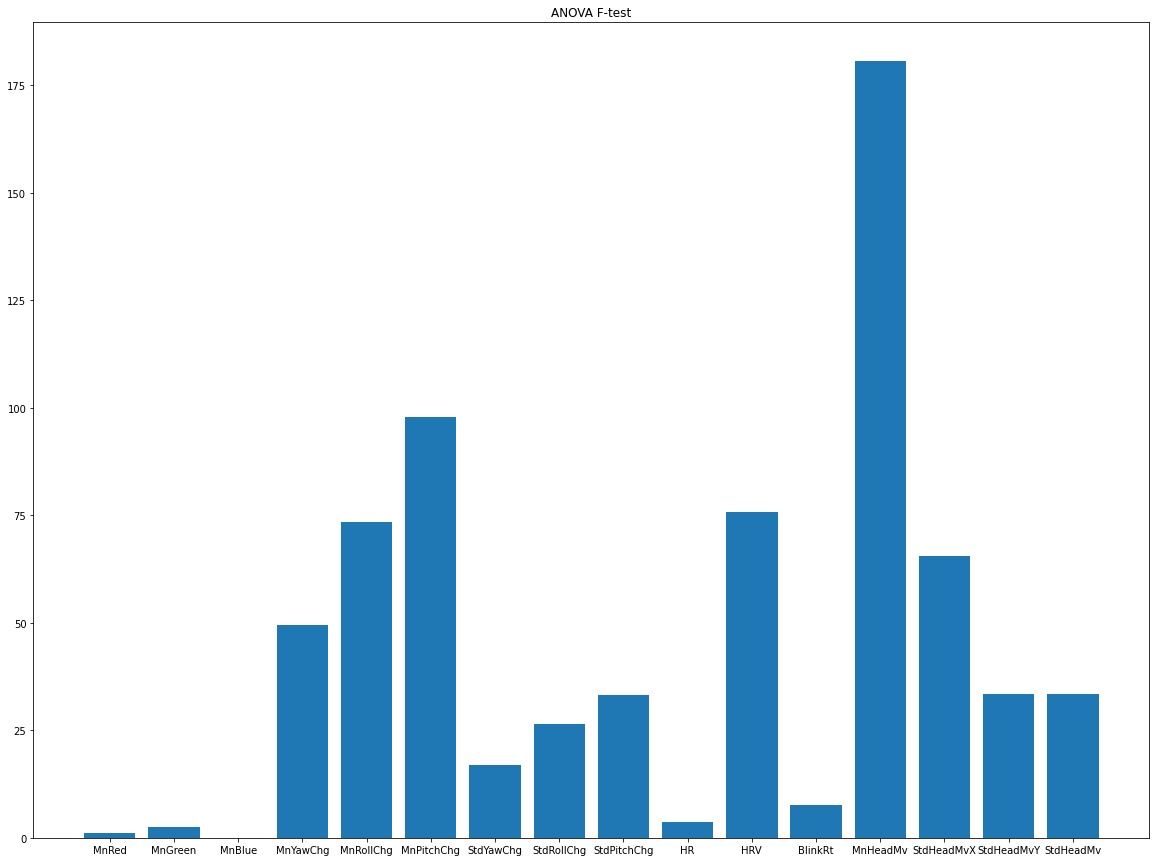

In [5]:
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %s: %f' % (label[i], fs.scores_[i]))
# plot the scores
plt.figure(figsize=(20,15))
plt.bar([i for i in label], fs.scores_)
plt.title('ANOVA F-test')
plt.show()

### MACHINE LEARNING & VALIDATION METHOD
As we can see from the ANOVA F-test above, Top 5 most impactful features are Mean Head Movement, Mean Pitch Change, Heart Rate Variability, Mean Roll Change, and Standard Deviation Head Movement in X-axis. We can try using the combination of the TOP 3, TOP 4, TOP 5 impactful features, or ALL features to train the most accurate machine learning model prediction to predict anxiety using this data. <br>
<br> The machine learning algorithm that will be used is Support Vector Machine (SVM) due to its characteristic of performing good for high dimensional data, automatically regularized which can reduce overfitting. SVM algorithm will be used using Radial Basis Function (rbf) Kernel and using C value of 3 as parameters after several different trials using different combinations of value.\n Validation method that are used in this project are 70-30 train-test split, confusion matrix and 4-fold cross validation to find the best model to detect seizure.

In [6]:
# Perfomance using TOP 3 features
X_three = df.iloc[:, [4,5,12]]
y_three = df['Stress']

X_train_three, X_test_three, y_train_three, y_test_three = train_test_split(X_three, y_three, test_size=0.3, random_state=rand_num)
sv1 = svm.SVC(kernel='rbf', C=c_val)
sv1.fit(X_train_three, y_train_three)

y_pred_three = sv1.predict(X_test_three)

print("\nPerformance score using 3-top rated features:")
print(metrics.classification_report(y_test_three, y_pred_three))

# Perfomance using TOP 4 features
X_four = df.iloc[:, [4,5,12,13]]
y_four = df['Stress']

X_train_four, X_test_four, y_train_four, y_test_four = train_test_split(X_four, y_four, test_size=0.3, random_state=rand_num)
sv2 = svm.SVC(kernel='rbf', C=c_val)
sv2.fit(X_train_four, y_train_four)

y_pred_four = sv2.predict(X_test_four)

print("\nPerformance score Using 4-top rated features:")
print(metrics.classification_report(y_test_four, y_pred_four))


Performance score using 3-top rated features:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        63
           1       0.92      0.94      0.93       140

    accuracy                           0.90       203
   macro avg       0.89      0.88      0.88       203
weighted avg       0.90      0.90      0.90       203


Performance score Using 4-top rated features:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        63
           1       0.92      0.95      0.94       140

    accuracy                           0.91       203
   macro avg       0.90      0.89      0.89       203
weighted avg       0.91      0.91      0.91       203



In [7]:
# Perfomance using TOP 5 features
X_five = df.iloc[:, [4,5,10,12,13]]
y_five = df['Stress']

X_train_five, X_test_five, y_train_five, y_test_five = train_test_split(X_five, y_five, test_size=0.3, random_state=rand_num)
sv4 = svm.SVC(kernel='rbf', C=c_val)
sv4.fit(X_train_five, y_train_five)

y_pred_five = sv4.predict(X_test_five)

print("\nPerformance score Using 5-top rated features:")
print(metrics.classification_report(y_test_five, y_pred_five))

# Perfomance using all features
X = df.drop("Stress", axis = 1)
y = df["Stress"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_num)
sv3 = svm.SVC(kernel='rbf', C=c_val)
sv3.fit(X_train, y_train)

y_pred = sv3.predict(X_test)

print("\nPerformance score using all features:")
print(metrics.classification_report(y_test, y_pred))


Performance score Using 5-top rated features:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        63
           1       0.79      0.89      0.84       140

    accuracy                           0.76       203
   macro avg       0.73      0.68      0.70       203
weighted avg       0.75      0.76      0.75       203


Performance score using all features:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        63
           1       0.79      0.89      0.84       140

    accuracy                           0.76       203
   macro avg       0.73      0.68      0.70       203
weighted avg       0.75      0.76      0.75       203



As we can see, the performance score of our maching learning model using TOP 5 impactful features and ALL features resulted worse then using the TOP 3, and TOP 4 impactful features, and so we will continue to confusion matrix without considering these two method.

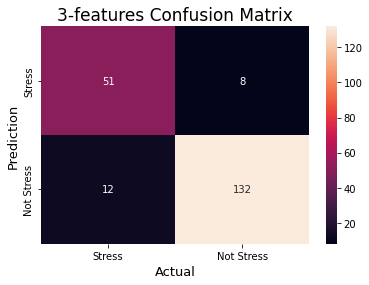

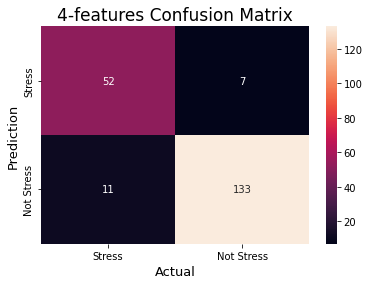

In [8]:
# cofusion matrix 3 feature

cm1 = metrics.confusion_matrix(y_pred_three, y_test_three)

sns.heatmap(cm1,
            annot=True,
            fmt='g',
            xticklabels=['Stress','Not Stress'],
            yticklabels=['Stress','Not Stress'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('3-features Confusion Matrix',fontsize=17)
plt.show()

# confusion matrix 4 feature

cm2 = metrics.confusion_matrix(y_pred_four, y_test_four)

sns.heatmap(cm2,
            annot=True,
            fmt='g',
            xticklabels=['Stress','Not Stress'],
            yticklabels=['Stress','Not Stress'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('4-features Confusion Matrix',fontsize=17)
plt.show()

The result of these two are similiar and it is still unclear which number of features can best train the SVM algorithm to predict seizure using procured data, and so we are going to proceed to 4-fold cross validation still considering these two method.

In [9]:
# k-fold 3 features

scores1 = cross_val_score(sv1, X_three, y_three, cv = 11)
print("3-feature Mean score of %0.2f with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))
print(scores1)
print("\n")

# k-fold 4 features

scores2 = cross_val_score(sv2, X_four, y_four, cv = 11)
print("4-feature Mean score of %0.2f with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))
print(scores2)

3-feature Mean score of 0.89 with a standard deviation of 0.05
[0.91935484 0.91935484 0.80645161 0.90322581 0.88709677 0.85245902
 0.83606557 0.96721311 0.8852459  0.96721311 0.80327869]


4-feature Mean score of 0.91 with a standard deviation of 0.04
[0.96774194 0.9516129  0.82258065 0.90322581 0.88709677 0.90163934
 0.90163934 0.95081967 0.95081967 0.93442623 0.8852459 ]


4-feature machine learning method have better mean accuracy when tested in multiple different condition, with smaller standard deviation for accuracy throughout all different condition. This makes the 4-feature Support Vector Machine the better algorithm to be used to predict anxiety in this dataset. The following part is the performance result of 4-feature SVM algorithm in predicting anxiety in this procured dataset.

### PERFORMANCE

In [10]:
y_pred_all = sv2.predict(X_four)

print('Performance metrics of 4-top rated features for all data')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_four, y_pred_all, squared=True)
rmse = mean_squared_error(y_four, y_pred_all, squared=False)
r2score = r2_score(y_four, y_pred_all)
print('MSE: ',mse)
print('RMSE: ',rmse)
print('RSquared: ', r2score)

tss = 0
y_test_four = np.array(y_test_four)
for i in range(len(y_test_four)):
    tss = tss + ((y_test_four[i]-y_pred_four[i])**2)
print('TSS: ', tss)

Performance metrics of 4-top rated features for all data
MSE:  0.07692307692307693
RMSE:  0.2773500981126146
RSquared:  0.6671054500686586
TSS:  18
